<a href="https://colab.research.google.com/github/mohamedsaid222/Animation/blob/main/Drug_Classification_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
prathamtripathi_drug_classification_path = kagglehub.dataset_download('prathamtripathi/drug-classification')

print('Data source import complete.')


Data source import complete.


In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/drug-classification/drug200.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [11]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
               Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


In [12]:
print("\nMissing values:\n", df.isna().sum())


Missing values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


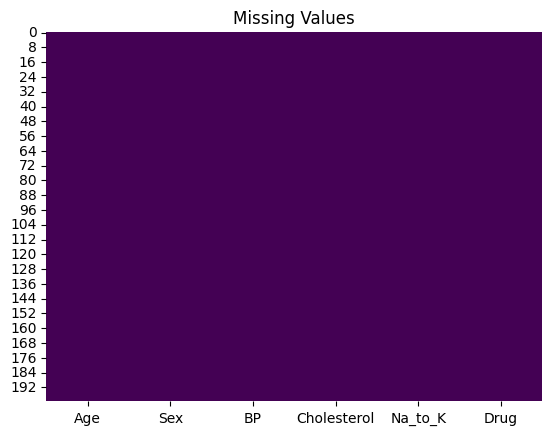

In [13]:
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Missing Values")
plt.show()


In [14]:

for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after filling:\n", df.isna().sum())


Missing values after filling:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [15]:

df = pd.get_dummies(df, drop_first=True)

print("Data after One-Hot Encoding:")
print(df.head())


Data after One-Hot Encoding:
   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL  Drug_drugA  \
0   23   25.355  False   False      False               False       False   
1   47   13.093   True    True      False               False       False   
2   47   10.114   True    True      False               False       False   
3   28    7.798  False   False       True               False       False   
4   61   18.043  False    True      False               False       False   

   Drug_drugB  Drug_drugC  Drug_drugX  
0       False       False       False  
1       False        True       False  
2       False        True       False  
3       False       False        True  
4       False       False       False  


In [16]:

df_encoded = pd.get_dummies(df, drop_first=True)

print("Data after One-Hot Encoding:\n", df_encoded.head())


Data after One-Hot Encoding:
    Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL  Drug_drugA  \
0   23   25.355  False   False      False               False       False   
1   47   13.093   True    True      False               False       False   
2   47   10.114   True    True      False               False       False   
3   28    7.798  False   False       True               False       False   
4   61   18.043  False    True      False               False       False   

   Drug_drugB  Drug_drugC  Drug_drugX  
0       False       False       False  
1       False        True       False  
2       False        True       False  
3       False       False        True  
4       False       False       False  


In [17]:

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded = df_encoded.astype(int)

print("Data after One-Hot Encoding:\n", df_encoded.head())


Data after One-Hot Encoding:
    Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL  Drug_drugA  \
0   23       25      0       0          0                   0           0   
1   47       13      1       1          0                   0           0   
2   47       10      1       1          0                   0           0   
3   28        7      0       0          1                   0           0   
4   61       18      0       1          0                   0           0   

   Drug_drugB  Drug_drugC  Drug_drugX  
0           0           0           0  
1           0           1           0  
2           0           1           0  
3           0           0           1  
4           0           0           0  


In [18]:
print(df_encoded.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 200 non-null    int64
 1   Na_to_K             200 non-null    int64
 2   Sex_M               200 non-null    int64
 3   BP_LOW              200 non-null    int64
 4   BP_NORMAL           200 non-null    int64
 5   Cholesterol_NORMAL  200 non-null    int64
 6   Drug_drugA          200 non-null    int64
 7   Drug_drugB          200 non-null    int64
 8   Drug_drugC          200 non-null    int64
 9   Drug_drugX          200 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB
None


In [19]:
print(df_encoded.describe())

              Age    Na_to_K       Sex_M      BP_LOW   BP_NORMAL  \
count  200.000000  200.00000  200.000000  200.000000  200.000000   
mean    44.315000   15.58500    0.520000    0.320000    0.295000   
std     16.544315    7.19944    0.500854    0.467647    0.457187   
min     15.000000    6.00000    0.000000    0.000000    0.000000   
25%     31.000000   10.00000    0.000000    0.000000    0.000000   
50%     45.000000   13.00000    1.000000    0.000000    0.000000   
75%     58.000000   19.00000    1.000000    1.000000    1.000000   
max     74.000000   38.00000    1.000000    1.000000    1.000000   

       Cholesterol_NORMAL  Drug_drugA  Drug_drugB  Drug_drugC  Drug_drugX  
count          200.000000  200.000000  200.000000  200.000000  200.000000  
mean             0.485000    0.115000    0.080000    0.080000    0.270000  
std              0.501029    0.319823    0.271974    0.271974    0.445074  
min              0.000000    0.000000    0.000000    0.000000    0.000000  
25%    

In [20]:
print(df_encoded.isnull().sum())


Age                   0
Na_to_K               0
Sex_M                 0
BP_LOW                0
BP_NORMAL             0
Cholesterol_NORMAL    0
Drug_drugA            0
Drug_drugB            0
Drug_drugC            0
Drug_drugX            0
dtype: int64


In [21]:
X = df_encoded.drop(['Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX'], axis=1)
y = df_encoded[['Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX']]


In [22]:
print(df.columns)


Index(['Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL',
       'Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX'],
      dtype='object')


In [23]:

df['Drug'] = df[['Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX']].idxmax(axis=1)

from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df['Drug'])

X = df.drop(['Drug','Drug_drugA','Drug_drugB','Drug_drugC','Drug_drugX'], axis=1)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Training Done ✅")


Training Done ✅


In [25]:
# Target = Drug
X = df.drop("Drug", axis=1)
y = df["Drug"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (200, 10)
Shape of y: (200,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (160, 10)
Test size: (40, 10)


In [27]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

  Drug_drugA       1.00      1.00      1.00        23
  Drug_drugB       1.00      1.00      1.00         3
  Drug_drugC       1.00      1.00      1.00         3
  Drug_drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



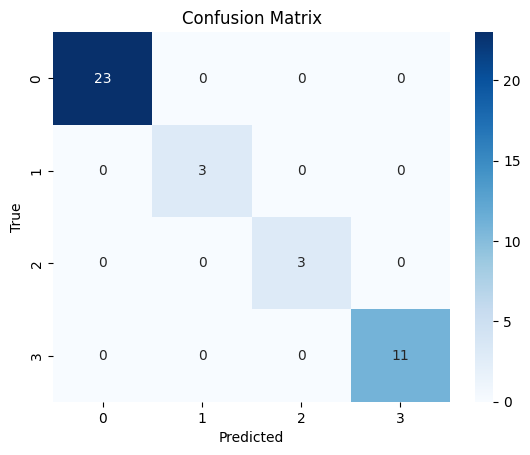

In [28]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Training Done")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Training Done
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

  Drug_drugA       1.00      1.00      1.00        23
  Drug_drugB       1.00      1.00      1.00         3
  Drug_drugC       1.00      1.00      1.00         3
  Drug_drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[23  0  0  0]
 [ 0  3  0  0]
 [ 0  0  3  0]
 [ 0  0  0 11]]


In [30]:

y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

print(results.head(20))


         Actual   Predicted
4    Drug_drugA  Drug_drugA
136  Drug_drugB  Drug_drugB
82   Drug_drugC  Drug_drugC
143  Drug_drugA  Drug_drugA
116  Drug_drugX  Drug_drugX
92   Drug_drugA  Drug_drugA
105  Drug_drugX  Drug_drugX
154  Drug_drugA  Drug_drugA
45   Drug_drugX  Drug_drugX
152  Drug_drugX  Drug_drugX
123  Drug_drugA  Drug_drugA
106  Drug_drugX  Drug_drugX
180  Drug_drugA  Drug_drugA
198  Drug_drugX  Drug_drugX
193  Drug_drugC  Drug_drugC
23   Drug_drugA  Drug_drugA
185  Drug_drugA  Drug_drugA
178  Drug_drugA  Drug_drugA
145  Drug_drugX  Drug_drugX
128  Drug_drugA  Drug_drugA


In [31]:

y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results["Correct"] = results["Actual"] == results["Predicted"]

results["Correct"] = results["Correct"].map({True: "✅", False: "❌"})

print(results.head(20))


         Actual   Predicted Correct
4    Drug_drugA  Drug_drugA       ✅
136  Drug_drugB  Drug_drugB       ✅
82   Drug_drugC  Drug_drugC       ✅
143  Drug_drugA  Drug_drugA       ✅
116  Drug_drugX  Drug_drugX       ✅
92   Drug_drugA  Drug_drugA       ✅
105  Drug_drugX  Drug_drugX       ✅
154  Drug_drugA  Drug_drugA       ✅
45   Drug_drugX  Drug_drugX       ✅
152  Drug_drugX  Drug_drugX       ✅
123  Drug_drugA  Drug_drugA       ✅
106  Drug_drugX  Drug_drugX       ✅
180  Drug_drugA  Drug_drugA       ✅
198  Drug_drugX  Drug_drugX       ✅
193  Drug_drugC  Drug_drugC       ✅
23   Drug_drugA  Drug_drugA       ✅
185  Drug_drugA  Drug_drugA       ✅
178  Drug_drugA  Drug_drugA       ✅
145  Drug_drugX  Drug_drugX       ✅
128  Drug_drugA  Drug_drugA       ✅


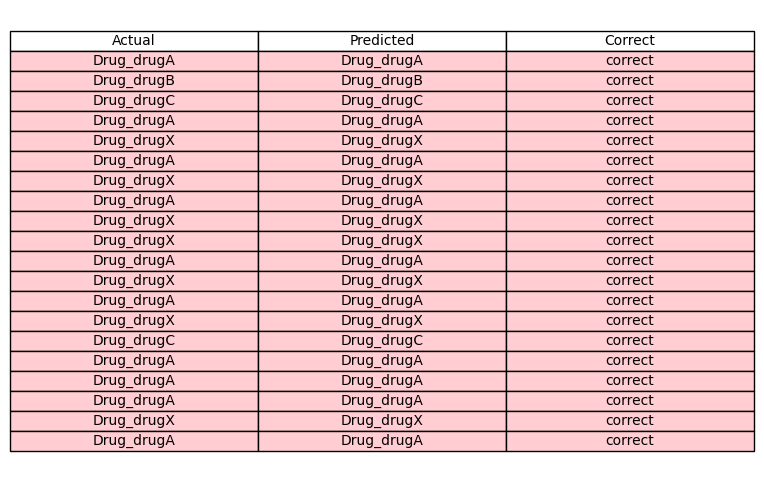

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
results["Correct"] = results["Actual"] == results["Predicted"]

results["Correct"] = results["Correct"].map({True: "correct", False: "incorrect"})

table = results.head(20)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("off")
tbl = ax.table(cellText=table.values, colLabels=table.columns, loc="center", cellLoc="center")

for i in range(len(table)):
    if table.iloc[i, 2] == "✅":
        [tbl[(i+1, j)].set_facecolor("#c8e6c9") for j in range(len(table.columns))]
    else:
        [tbl[(i+1, j)].set_facecolor("#ffcdd2") for j in range(len(table.columns))]

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

plt.show()


In [33]:
import pandas as pd

#
new_data = pd.DataFrame([{
    "Age": 30,
    "Na_to_K": 12,
    "Sex_M": 1,              # Male = 1, Female = 0
    "BP_LOW": 0,
    "BP_NORMAL": 1,
    "Cholesterol_NORMAL": 0,
}])

print(new_data)


   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   30       12      1       0          1                   0


In [34]:

columns = X_train.columns

new_data = pd.DataFrame([{
    "Age": 30,
    "Na_to_K": 12,
    "Sex_M": 1,
    "BP_LOW": 0,
    "BP_NORMAL": 1,
    "Cholesterol_NORMAL": 0,
    #
    "Drug_drugA": 0,
    "Drug_drugB": 0,
    "Drug_drugC": 0,
    "Drug_drugX": 0
}])[columns]

# prediction
prediction = model.predict(new_data)
print("Predicted class:", prediction[0].replace("Drug_", ""))


Predicted class: drugA


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Age", "Na_to_K", "Sex_M", "BP_LOW", "BP_NORMAL", "Cholesterol_NORMAL"]]


y = df["Drug"]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

  Drug_drugA       0.87      0.95      0.91        21
  Drug_drugB       0.67      0.67      0.67         3
  Drug_drugC       1.00      0.80      0.89         5
  Drug_drugX       0.90      0.82      0.86        11

    accuracy                           0.88        40
   macro avg       0.86      0.81      0.83        40
weighted avg       0.88      0.88      0.87        40


Confusion Matrix:
 [[20  0  0  1]
 [ 1  2  0  0]
 [ 1  0  4  0]
 [ 1  1  0  9]]


In [36]:

train_accuracy = model.score(X_train, y_train)


test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.93125
Test Accuracy: 0.875


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("✅ Random Forest Training Done")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Detailed Report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))


✅ Random Forest Training Done
Train Accuracy: 1.0
Test Accuracy: 1.0

Classification Report (Test):
               precision    recall  f1-score   support

  Drug_drugA       1.00      1.00      1.00        21
  Drug_drugB       1.00      1.00      1.00         3
  Drug_drugC       1.00      1.00      1.00         5
  Drug_drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix (Test):
 [[21  0  0  0]
 [ 0  3  0  0]
 [ 0  0  5  0]
 [ 0  0  0 11]]


In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_model = RandomForestClassifier(random_state=42)

# Cross Validation (5-fold)
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))


Cross Validation Scores: [1.  1.  1.  0.9 1. ]
Mean Accuracy: 0.9800000000000001
Standard Deviation: 0.039999999999999994


In [39]:
coef = model.coef_[0]
feature_names = X.columns

feat_coef = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coef
}).sort_values(by="Coefficient", ascending=False)

print("⚖️ Logistic Regression Coefficients:\n", feat_coef)


⚖️ Logistic Regression Coefficients:
               Feature  Coefficient
2               Sex_M     0.530155
1             Na_to_K     0.512550
5  Cholesterol_NORMAL     0.260901
0                 Age    -0.045593
4           BP_NORMAL    -0.973638
3              BP_LOW    -1.569753


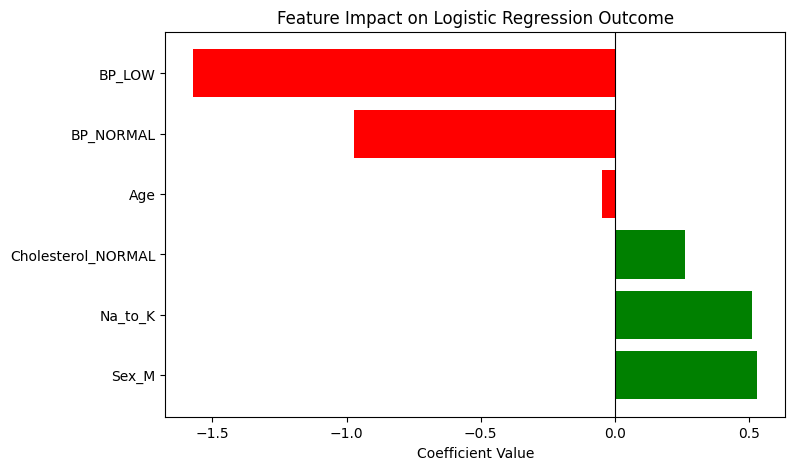

In [40]:
import matplotlib.pyplot as plt

features = ['Sex_M', 'Na_to_K', 'Cholesterol_NORMAL', 'Age', 'BP_NORMAL', 'BP_LOW']
coefficients = [0.530942, 0.513218, 0.261623, -0.045600, -0.973509, -1.570954]


plt.figure(figsize=(8,5))
colors = ['green' if c > 0 else 'red' for c in coefficients]
plt.barh(features, coefficients, color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Logistic Regression Outcome')
plt.axvline(x=0, color='black', linewidth=0.8)  # خط الصفر
plt.show()


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.88
Confusion Matrix:
[[20  0  0  1]
 [ 1  2  0  0]
 [ 1  0  4  0]
 [ 1  1  0  9]]
Classification Report:
              precision    recall  f1-score   support

  Drug_drugA       0.87      0.95      0.91        21
  Drug_drugB       0.67      0.67      0.67         3
  Drug_drugC       1.00      0.80      0.89         5
  Drug_drugX       0.90      0.82      0.86        11

    accuracy                           0.88        40
   macro avg       0.86      0.81      0.83        40
weighted avg       0.88      0.88      0.87        40



In [42]:
train_accuracy = model.score(X_train, y_train)


test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.93125
Test Accuracy: 0.875


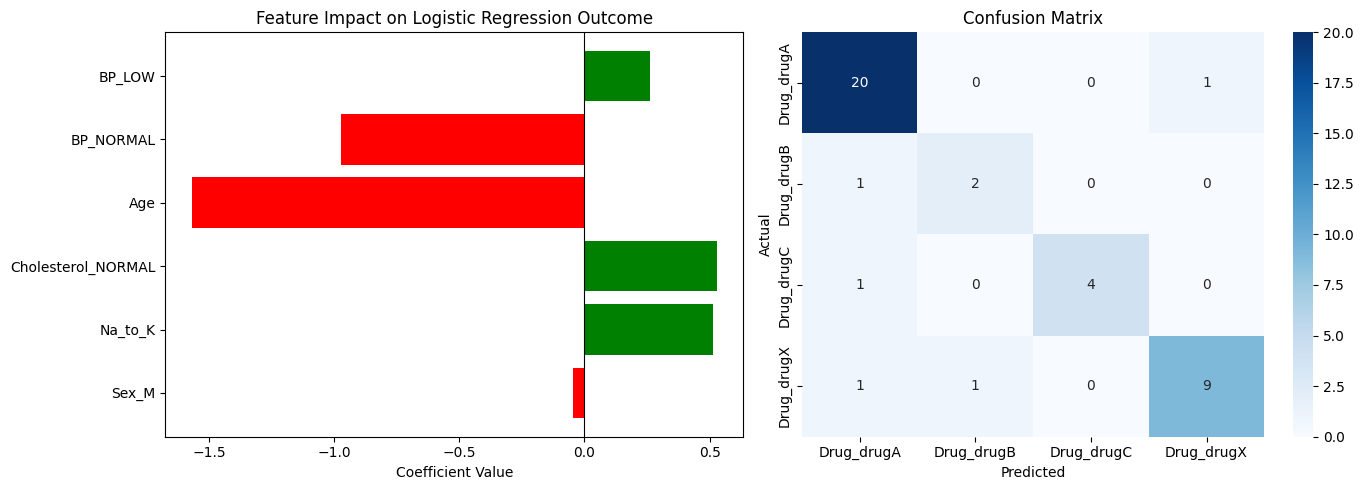

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

features = ['Sex_M', 'Na_to_K', 'Cholesterol_NORMAL', 'Age', 'BP_NORMAL', 'BP_LOW']
coefficients = model.coef_[0]  # لو binary classification


plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
colors = ['green' if c > 0 else 'red' for c in coefficients]
plt.barh(features, coefficients, color=colors)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Logistic Regression Outcome')


plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()
